# Lecture 4.3: Central Limit Theorem

## Outline
* Brief review of sampling
* Sampling distribution of the mean
* Standard error of the mean
* Central Limit Theorem

## Objectives
1. Basic understanding of the Central Limit Theorem (CLT)
2. Know how to find the distribution of a sample mean by CLT

## Sampling
In general you will not have access to full populations for analysis.  
Instead you will infer properties of the population based on samples.

### Common Types of Sampling

* Simple random sampling
    * Very commonly used, grab elements at random from the population, every member of population has equal chance of being selected  


* Stratified sampling
    * Used to maintain proportions of populations  
 

<img src = 'images/sampling1.png'>

<img src = 'images/sampling2.png'>

<img src = 'images/sampling3.png'>

<img src = 'images/sampling4.png'>

<img src = 'images/sampling5.png'>

## Sampling Distribution of the Sample Mean  

* The sample mean is an unbiased estimator of the population mean.  
* However, if you sample multiple times from the same population, you will get different results for the sample mean, so the distribution of sample means has some variance.

### Let's try an example

In [1]:
%pylab inline 

import pandas as pd

from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
dist = stats.uniform(0,1)

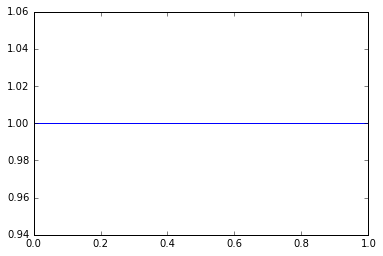

In [3]:
x = linspace(0.001,0.999,1000)
plot(x, dist.pdf(x));

We have a uniform distribution from 0 to 1, what will the mean be?

In [4]:
dist.mean()

0.5

What about the standard deviation (the square root of the variance)?

In [5]:
dist.std()

0.28867513459481287

Those are true/population values, calculated using the whole distribution.  
What about samples?

In [6]:
sample1 = dist.rvs(size=5)
print(sample1)

[ 0.21283615  0.62795869  0.62212587  0.1754183   0.57952004]


In [7]:
sample1.mean()

0.44357180826046172

Let's take another sample

In [8]:
sample2 = dist.rvs(size=5)
print(sample2)

[ 0.38336364  0.91356101  0.24094599  0.90950731  0.83018535]


In [9]:
sample2.mean()

0.65551266089812288

In [10]:
sample3 = dist.rvs(size=5)
print(sample3)

[ 0.10193705  0.56869838  0.30506348  0.45379934  0.77435827]


In [11]:
sample3.mean()

0.4407713039749197

Now let's try sampling multiple times:

In [12]:
def sample_means(num_samples = 10, size = 5, dist = stats.uniform(0,1)):
    means = []
    for i in range(num_samples):
        means.append(dist.rvs(size=size).mean())
    return means   

In [13]:
sample_means()

[0.65507194488126586,
 0.474696044231805,
 0.68740406678291033,
 0.57188688956800671,
 0.46851272242557374,
 0.66714755359141553,
 0.76538363446888347,
 0.3094739005411461,
 0.40632938701146859,
 0.39469803961481442]

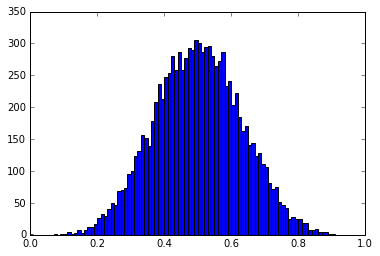

In [14]:
# sample 10000 times
means_size5 = array(sample_means(10000))
hist(means_size5, bins = linspace(0,1,101));

What is the mean of these values?  

**Note**: This is the mean of the sample means $\bar{x}$, not the mean of $x$

In [15]:
means_size5.mean()

0.5007171384952841

What about the standard deviation?  

In [16]:
means_size5.std()

0.12976003826159452

**Note**: This is the standard deviation of the observed sample means $\bar{x}$'s, which is an estimate of the true standard deviation of $\bar{X}$, i.e. the standard error of the sample mean $\bar{X}$.

What happens as we increase number of samples?

In [17]:
dist.rvs(size=100).mean()

0.49721926121938481

In [18]:
dist.rvs(size=100).mean()

0.47306792410403509

In [19]:
dist.rvs(size=100).mean()

0.51633247368062685

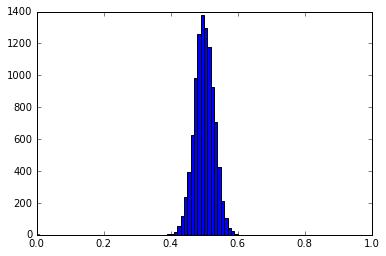

In [20]:
# sample 10000 times
means_size100 = array(sample_means(10000, 100))
hist(means_size100, bins=linspace(0, 1, 101));

In [21]:
means_size100.mean()

0.49984791167907577

In [22]:
means_size100.std()

0.028842221772168927

Let $ X_1,X_2,X_3,\ldots,X_n $ be i.i.d. random variables with mean $\mu$ and variance $\sigma^2$,  
$ T = X_1 + X_2 + X_3 + \ldots + X_n $,  
Then,  


$$ Var(T) = Var(X_1 + X_2 + X_3 + \ldots + X_n) = n\sigma^2$$
$$ Var (\bar{X}) = Var(T/n) = \frac{1}{n^2} \times n \sigma^2 $$
$$ Var(\bar{X}) = \frac{\sigma^2}{n} $$

## The Standard Error of the Mean  

The standard deviation of the sample mean is given by,  

$$SD(\bar{X}) = \frac{\sigma}{\sqrt{n}} $$

We call this the **standard error** of the mean (SEM), $SE_\bar{x}$, and we estimate it by:  

$$SE_\bar{x} = \frac{s}{\sqrt{n}} $$  

$s$ = standard deviation of sample  
$n$ = sample size

### Important Note:
The standard error of the mean drops as you increase the sample size, so larger samples have less variance in their means.

What happens if we keep increasing the sample size of each sample?

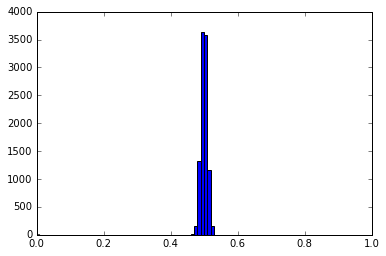

In [23]:
# Increase the sample size to 1000

means_size1000 = array(sample_means(10000, 1000))
hist(means_size1000, bins = linspace(0,1,101));

In [24]:
means_size1000.mean(), means_size1000.std()

(0.4997502106846432, 0.0092303241487547115)

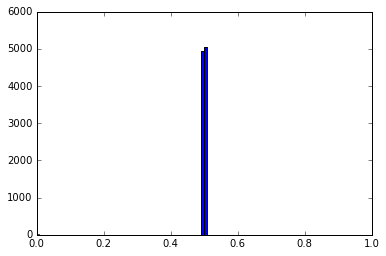

In [25]:
# Increase the sample size to 10000

means_size10000 = array(sample_means(10000, 10000))
hist(means_size10000, bins = linspace(0,1,101));

In [26]:
means_size10000.mean(), means_size10000.std()

(0.49998980942283472, 0.0028850041205419649)

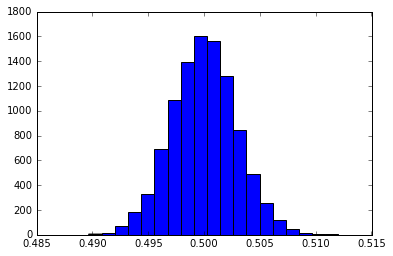

In [29]:
hist(means_size10000, bins = 20);

## Central Limit Theorem

Let $X_1, X_2, \dots, X_n$ be i.i.d random variables with *finite* mean $\mu$ and *finite* variance $\sigma^2$, from **ANY** distribution. If the sample size $n$ is "sufficiently large", then:

1. the sample mean $\bar{X}$ follows an approximate Normal distribution  

2. with mean $E(\bar{X}) = \mu_{\bar{X}} = \mu$  

3. and variance $Var(\bar{X}) = \sigma^2_{\bar{X}} = \frac{\sigma^2}{n}$ 

We write:

$$ \bar{X} \rightarrow Normal(\mu, \frac{\sigma^2}{n}) \text{ as } n \rightarrow \infty$$  

or: 

$$ \frac{\bar{X} - \mu}{\sigma/ \sqrt{n}} \rightarrow Normal(0, 1) \text{ as } n \rightarrow \infty$$ 

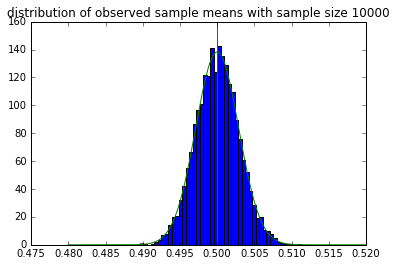

In [30]:
n = 10000
mean_of_means = dist.mean()
se_of_means = dist.std()/sqrt(n)

hist(means_size10000, bins = 50, normed=True)
title('distribution of observed sample means with sample size 10000')

axvline(mean_of_means, color='red')

x = linspace(0.48, 0.52, 1000)
nd = stats.norm(loc = mean_of_means, scale = se_of_means)
plot(x, nd.pdf(x),color='green');

### Assumptions

* The samples need to be iid (independently and identically distributed). 
* The sample size needs to be large enough (general rule of thumb, $n >30$).  


### Questions
What is large enough?

What restriction is there on the distribution you are drawing from?

In [31]:
def normalize(v):
    norm = float(linalg.norm(v,ord=1))
    if norm == 0:
        return v
    return array(v)/norm

x_vals = linspace(0,100,101)
y_vals = []
norm = stats.norm(loc=0, scale=1)
mid_range = linspace(-3, 3, 31)
random.seed(42)
rands = random.randint(5, 20, 20)

for i in range(101):
    if i < 20:
        y_vals.append(i)
    elif i < 40:
        random.seed(42)
        y_vals.append(i*rands[i-20])
    elif i < 50:
        y_vals.append(15)
    elif i < 60:
        y_vals.append(i)
    elif i < 90:
        y_vals.append(500 * norm.pdf(mid_range[i-59]))
    else:
        y_vals.append(i-50)

y_vals = normalize(y_vals)
custom = stats.rv_discrete(values=(x_vals, y_vals))

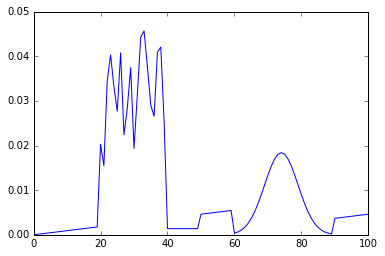

In [32]:
plot(x_vals, custom.pmf(x_vals));

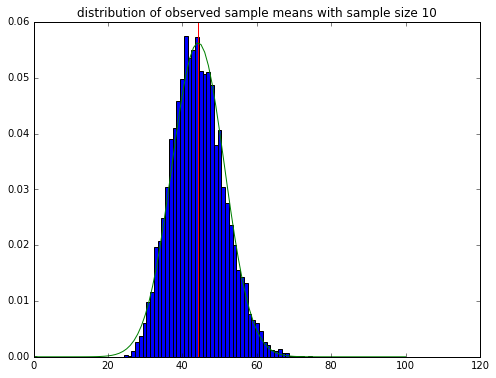

In [33]:
figure(figsize=(8, 6)) 

mean_val = custom.mean()
std_val = custom.std()

n = 10
num_samples = 10000

to_plot = sample_means(num_samples = num_samples, size = n, dist=custom)

hist(to_plot, bins = linspace(0,101,101),normed=True)
title('distribution of observed sample means with sample size {}'.format(n))

axvline(mean_val, color='red')

normd = stats.norm(loc=mean_val, scale=std_val/sqrt(n))
plot(x_vals, normd.pdf(x_vals), color='green');

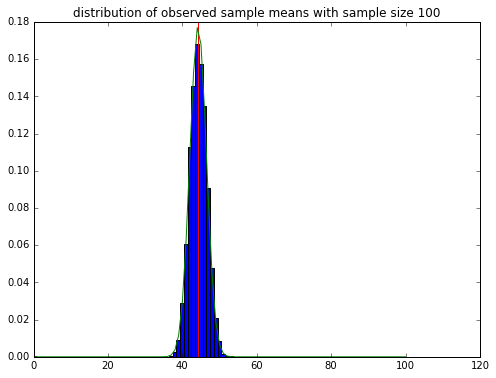

In [34]:
            figure(figsize=(8, 6))

n = 100
num_samples = 10000

to_plot = sample_means(num_samples = num_samples, size = n, dist=custom)

hist(to_plot, bins = linspace(0,101,101), normed=True)
title('distribution of observed sample means with sample size {}'.format(n))

axvline(mean_val, color='red')

normd = stats.norm(loc=mean_val, scale=std_val/sqrt(n))
plot(x_vals, normd.pdf(x_vals), color='green');

### Question

An elevator has a weight limit of 1300 kilograms, a survey of people who work in the building has shown they have a mean weight of 80 kg with a standard deviation of 4 kg.

What is the probability that 16 people getting on the elevator exceed the weight limit?

If we let $X$ be the weight of one person working in the building, then we know  

$$\mu = 80$$
$$\sigma = 4$$  

Now we have 16 people getting on the elevator, so we have $X_1, X_2, X_3, \dots, X_{16}$ that are i.i.d. from the distribution of X  

We want to find $P(X_1 + X_2 + \dots + X_{16} > 1300)$

But we don't know the exact distribution of $X$ - we only know its mean and standard deviation..

By CLT, the sample mean of the weights of 16 people is approximately Normally distributed,   

$$ \bar{X} \dot{\sim} N(\mu, \frac{\sigma^2}{n}) $$ 

What is $\frac{\sigma^2}{n}$?

What is $\mu$?

$$ \bar{X} \dot{\sim} N(80, 1) $$ 

$P(X_1 + X_2 + \dots + X_{16} > 1300)$ = $P(\bar{X} > \frac{1300}{16})$

What is $P(\bar{X} > 81.25)$?

In [35]:
1 - stats.norm(80, 1).cdf(81.25)

0.10564977366685535

In [36]:
stats.norm(80, 1).sf(81.25)

0.10564977366685535